In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("bodyfat.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['BodyFat', 'Density'])  # Features (all columns except 'BodyFat')
y = df['BodyFat']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = train_data = X_train.join(y_train)

In [2]:
# Assuming X_train is your DataFrame
column_names = X_train.columns.tolist()
print(column_names)

['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 136 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      201 non-null    int64  
 1   Weight   201 non-null    float64
 2   Height   201 non-null    float64
 3   Neck     201 non-null    float64
 4   Chest    201 non-null    float64
 5   Abdomen  201 non-null    float64
 6   Hip      201 non-null    float64
 7   Thigh    201 non-null    float64
 8   Knee     201 non-null    float64
 9   Ankle    201 non-null    float64
 10  Biceps   201 non-null    float64
 11  Forearm  201 non-null    float64
 12  Wrist    201 non-null    float64
 13  BodyFat  201 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 31.7 KB


In [4]:
import pandas as pd
train_data.describe()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,45.572139,178.077363,70.042289,37.961194,100.645274,92.625871,99.790547,59.228358,38.562687,22.997015,32.077612,28.681592,18.218905,19.435821
std,12.721872,28.003221,3.930341,2.347613,8.503887,10.670132,6.844637,5.132966,2.395694,1.574322,2.950770,2.034849,0.919098,8.696517
min,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,39.000000,157.750000,68.250000,36.400000,94.000000,84.400000,95.400000,56.000000,37.100000,22.000000,30.100000,27.300000,17.600000,12.400000
50%,44.000000,176.000000,70.000000,38.000000,99.600000,90.900000,99.300000,59.000000,38.400000,22.700000,31.800000,28.800000,18.300000,19.600000
75%,54.000000,198.000000,72.250000,39.500000,105.600000,99.800000,103.700000,62.100000,40.000000,23.900000,34.000000,30.000000,18.800000,25.800000
max,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,125.600000,74.400000,46.000000,33.700000,39.100000,34.900000,21.400000,47.500000


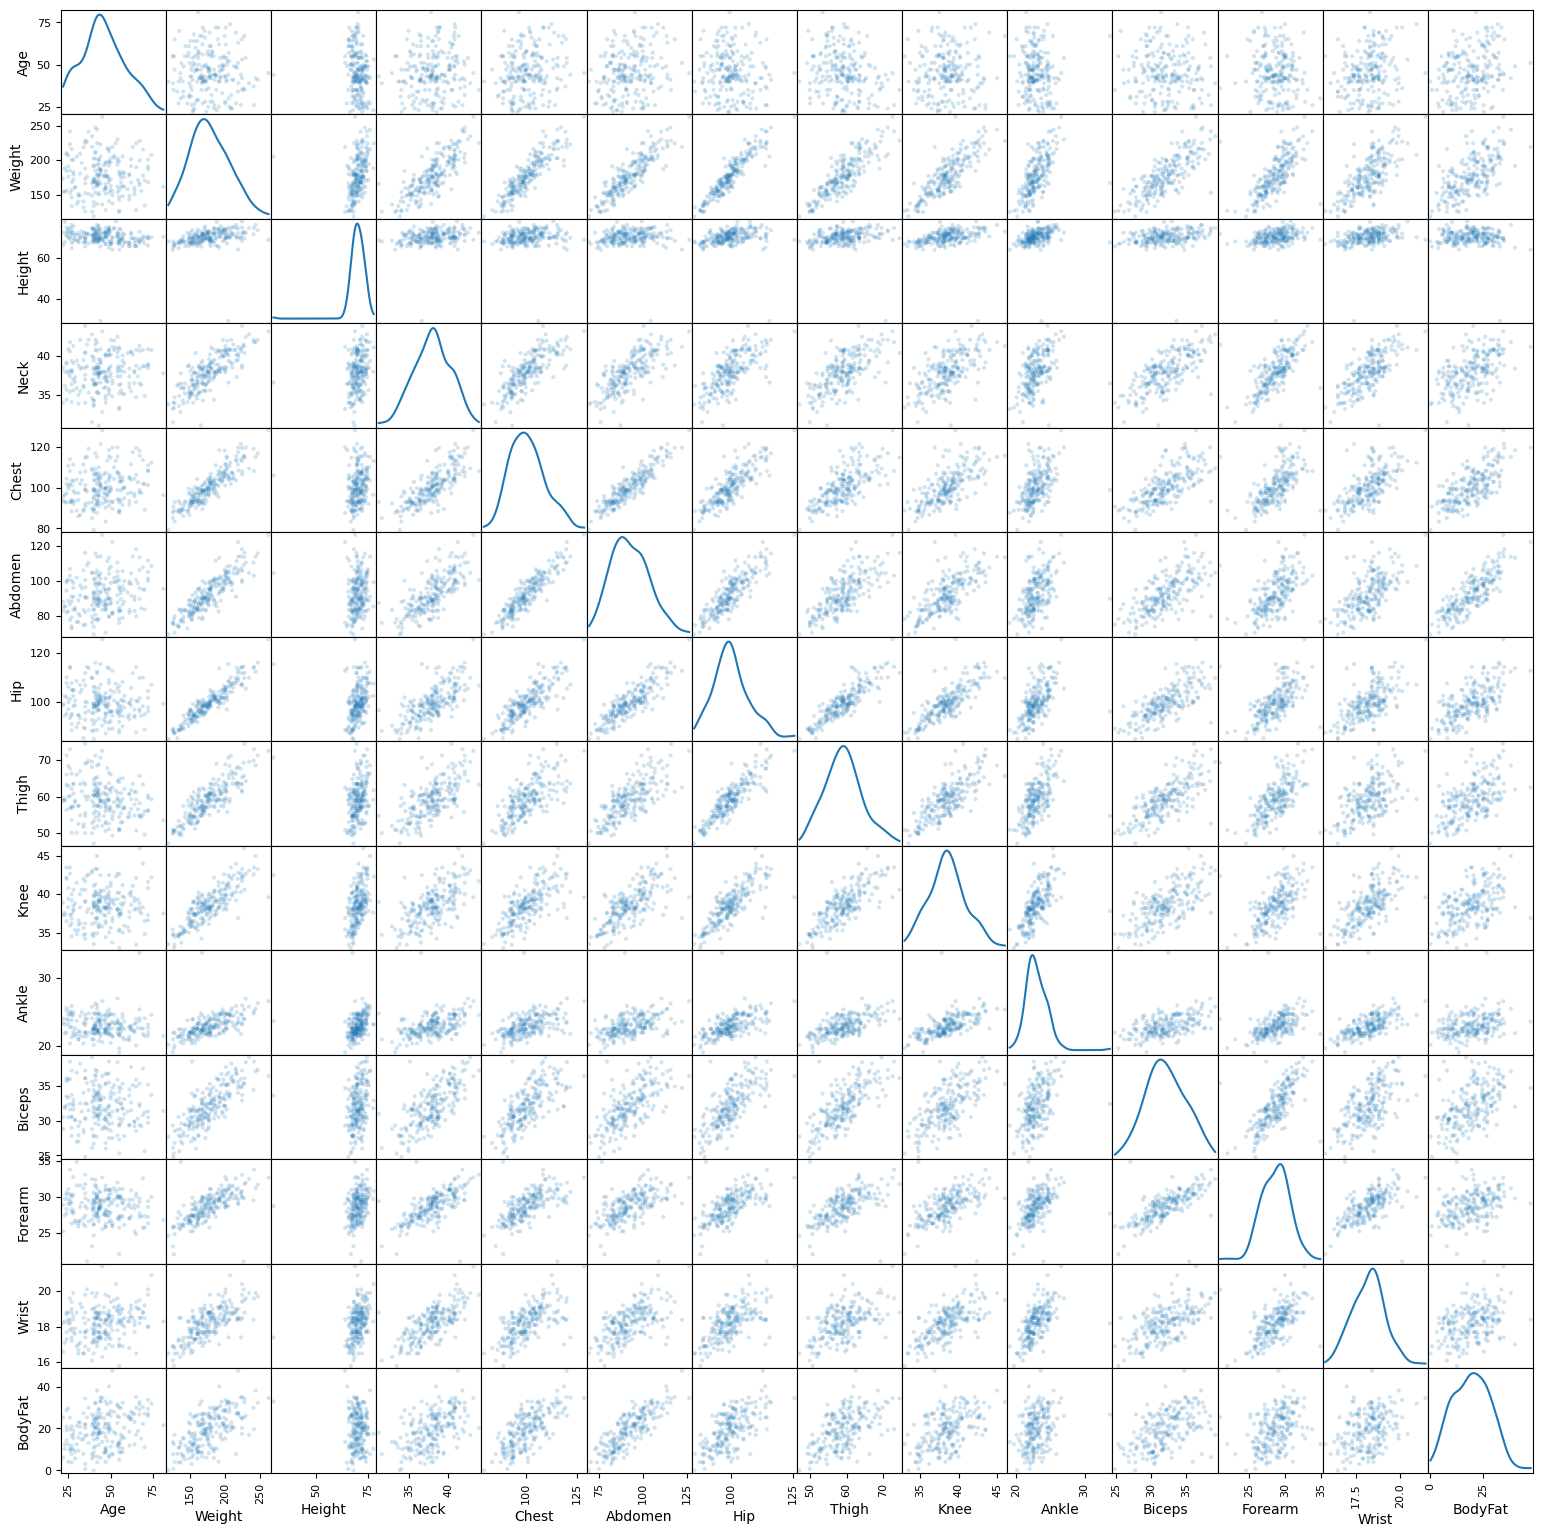

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(train_data, alpha = 0.2, figsize = (19, 19), diagonal = 'kde')
plt.show()

<Axes: >

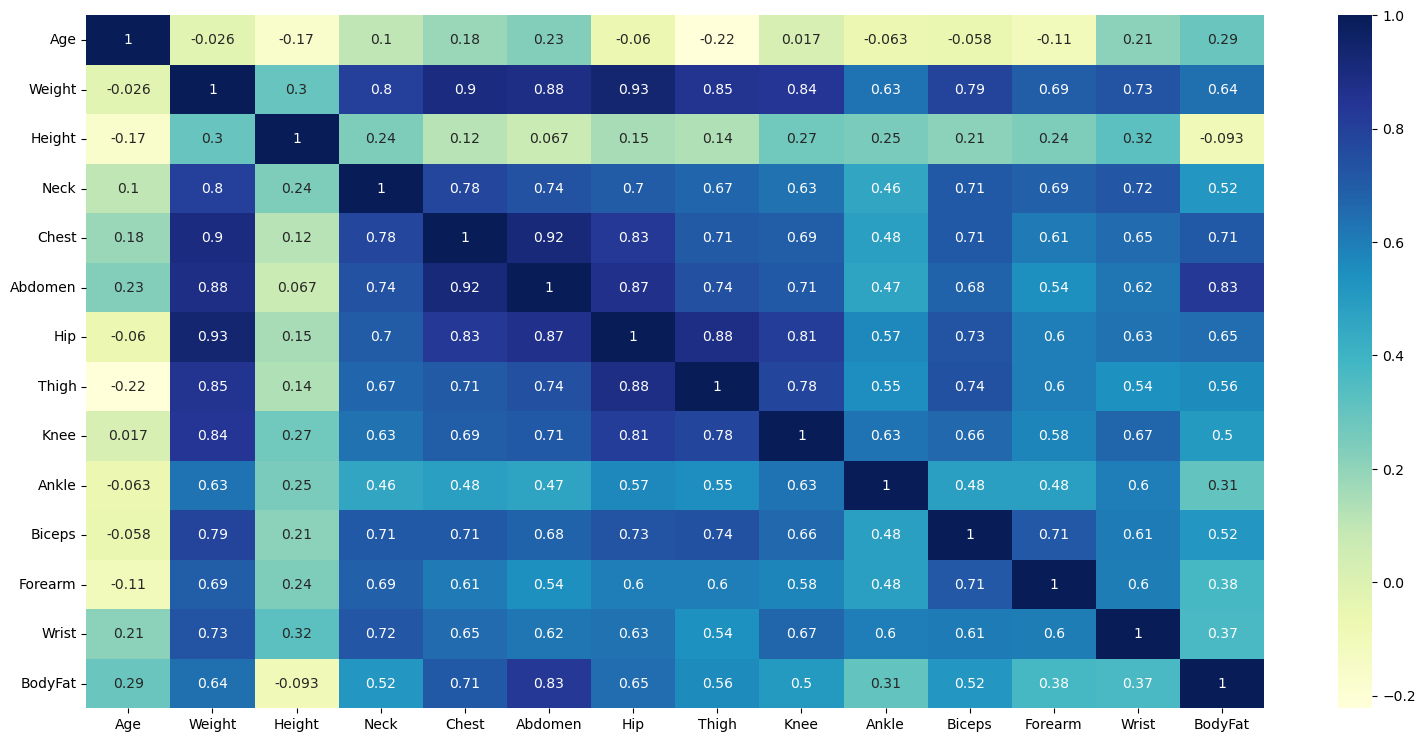

In [6]:
import seaborn as sns
plt.figure(figsize=(19,9))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [7]:
import numpy as np

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

def calculate_sd(y_true, y_pred):
    return np.std(y_pred - y_true)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred - y_true)**2))

def calculate_mac(y_true, y_pred):
    yTy = np.dot(y_true.T, y_true)
    y_predTy_pred = np.dot(y_pred.T, y_pred)
    yTy_predTy_pred = np.dot(y_true.T, y_pred) ** 2
    return yTy_predTy_pred / (yTy * y_predTy_pred)

In [8]:
import numpy as np

class RE_SVM:
    def __init__(self, C=1):
        self.C = C
        self.alpha = None
        self.bias = None
        
    def gaussian_kernel(self, x1, x2, sigma2=4*10**6):
        # Assuming a Gaussian (RBF) kernel here
        return np.exp(-np.linalg.norm(x1 - x2)*2 / (2 * sigma2))
    
    def fit(self, X, y):
        N = len(y)
        K = self.gaussian_kernel(X, X)
        
        y = np.array(y).reshape(-1, 1)
        ones = np.ones((N, 1))
        I = np.eye(N)
        yT_y = np.matmul(y.T, y)
        
        # Compute A matrix
        A = np.block([
            [K + ((yT_y* self.C**-1)* I) , ones],
            [ones.T, np.zeros((1, 1))]
        ])
        
        # Compute alpha and bias
        alpha_bias = np.linalg.solve(A, np.concatenate([y, [[0]]]))
        self.alpha = alpha_bias[:-1]
        self.bias = alpha_bias[-1]
        
    def predict(self, X):
        """
        Predict the target values for the given input data X.
        """
        N = len(self.alpha)
        y_pred = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            x = X[i]
            kernel_sum = 0
            for j in range(N):
                kernel_sum += self.alpha[j] * self.gaussian_kernel(X_train.values[j], x)
            y_pred[i] = kernel_sum + self.bias

        return y_pred


# Initialize the RE-SVM model
re_svm = RE_SVM(C=4*10**7)

# Train the model
re_svm.fit(X_train.values, y_train.values)

# Make predictions
y_pred = re_svm.predict(X_test.values)

print('Results for RE_SVM')
# Compute mean squared error
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate MAE
mae = calculate_mae(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate SD
sd = calculate_sd(y_test, y_pred)
print("Standard Deviation (SD):", sd)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)
print("Root Mean Square Error (RMSE):", rmse)

# Calculate MAC
mac = calculate_mac(y_test, y_pred)
print("Robustness (MAC):", mac)

Results for RE_SVM
Mean Squared Error: 34.5719
Mean Absolute Error (MAE): 4.893336180326375
Standard Deviation (SD): 5.775145822170229
Root Mean Square Error (RMSE): 5.879789120084631
Robustness (MAC): 0.9089144281656258


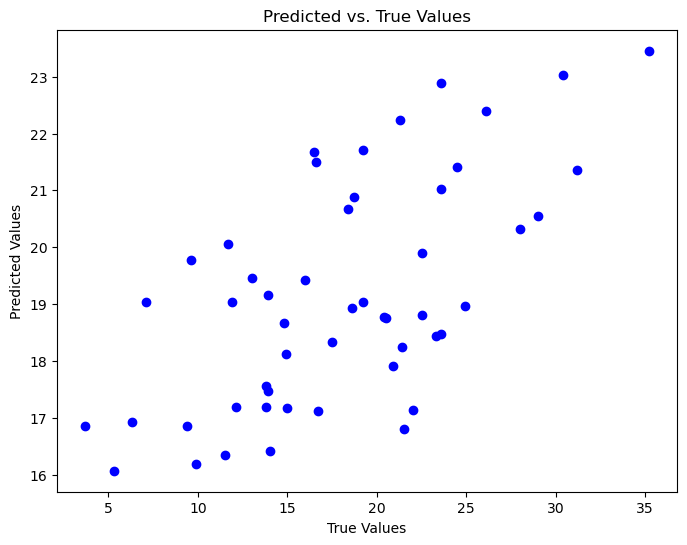

In [9]:
import matplotlib.pyplot as plt

# Plot predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

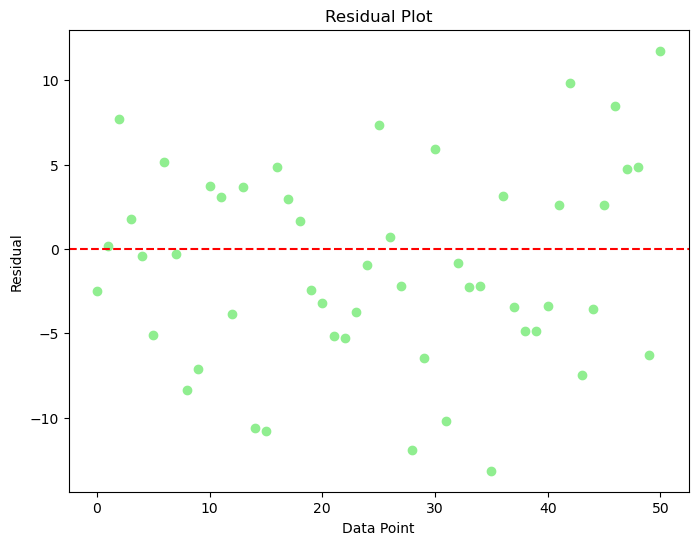

In [10]:
# Compute residuals
residuals = y_test- y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='lightgreen')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [15]:
import numpy as np

class IRE_SVM:
    def __init__(self, C=4*10**7, gamma_b=1):
        self.C = C
        self.gamma_b = gamma_b
        self.alpha = None
        self.bias = None
        
    def gaussian_kernel(self, x1, x2, sigma2=4*10**6):
        # Assuming a Gaussian (RBF) kernel here
        return np.exp(-np.linalg.norm(x1 - x2)*2 / (2 * sigma2))
    
    def fit(self, X, y):
        N = len(y)
        K = self.gaussian_kernel(X, X)
        
        y = np.array(y).reshape(-1, 1)
        ones = np.ones((N, 1))
        I = np.eye(N)
        yT_y = np.matmul(y.T, y)
        
        # Compute A matrix
        A = np.block([
            [K + yT_y * self.C**-1 * I, ones],
            [ones.T,  -self.gamma_b]
        ])
        
        # Compute alpha and bias
        alpha_bias = np.linalg.solve(A, np.concatenate([y, [[0]]]))
        self.alpha = alpha_bias[:-1]
        self.bias = alpha_bias[-1]
        
    def predict(self, X):
        """
        Predict the target values for the given input data X.
        """
        N = len(self.alpha)
        y_pred = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            x = X[i]
            kernel_sum = 0
            for j in range(N):
                kernel_sum += self.alpha[j] * self.gaussian_kernel(X_train.values[j], x)
            y_pred[i] = kernel_sum + self.bias

        return y_pred
        
    def predict_one(self, x):
        y_pred = 0
        for j in range(len(X_train)):
            y_pred += self.alpha[j] * self.gaussian_kernel(X_train.values[j], x)
        return y_pred + self.bias

# Initialize the IRE-SVM model
ire_svm = IRE_SVM(C=4*10**7, gamma_b=1)

# Train the model
ire_svm.fit(X_train.values, y_train.values)

# Make predictions
y_pred = ire_svm.predict(X_test.values)

print('Results for IRE_SVM')
# Compute mean squared error
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate MAE
mae = calculate_mae(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate SD
sd = calculate_sd(y_test, y_pred)
print("Standard Deviation (SD):", sd)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)
print("Root Mean Square Error (RMSE):", rmse)

# Calculate MAC
mac = calculate_mac(y_test, y_pred)
print("Robustness (MAC):", mac)

Results for IRE_SVM
Mean Squared Error: 34.5716
Mean Absolute Error (MAE): 4.893306879823366
Standard Deviation (SD): 5.775162874881327
Root Mean Square Error (RMSE): 5.879765372398331
Robustness (MAC): 0.9089141906389088


In [12]:
import joblib
# Save the model to a file
joblib.dump(ire_svm, 'model.pkl')

['model.pkl']

In [13]:
y_pred = ire_svm.predict(np.array([[ 35.  , 217.  ,  73.75,  40.5 , 107.5 ,  95.1 , 104.5 ,  64.8 ,
         41.3 ,  25.6 ,  36.4 ,  33.7 ,  19.4 ]]).reshape(1,-1))
y_pred

array([21.71619122])

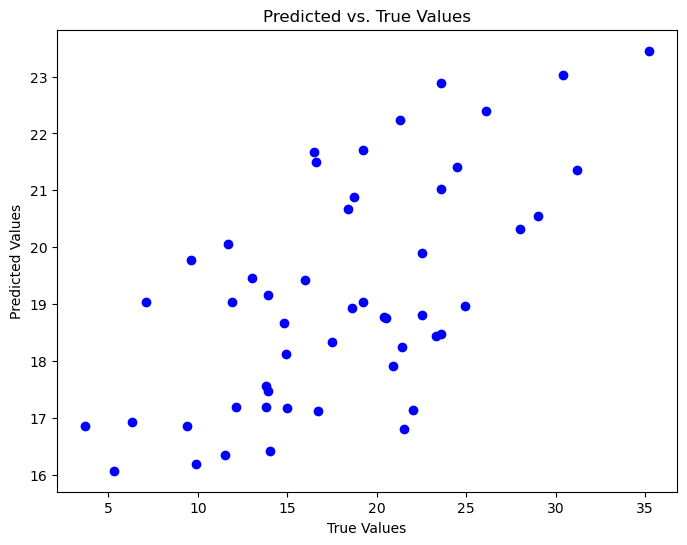

In [16]:
import matplotlib.pyplot as plt

# Plot predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [17]:
n = X_test.values
print(n.shape)
m = X_test.values[0].reshape(1,-1)
print(m.shape)
m

(51, 13)
(1, 13)


array([[ 35.  , 217.  ,  73.75,  40.5 , 107.5 ,  95.1 , 104.5 ,  64.8 ,
         41.3 ,  25.6 ,  36.4 ,  33.7 ,  19.4 ]])

In [18]:
real_y = np.array(y_test)[0]  # Directly access the value from the NumPy array
print("Real y:", real_y)

Real y: 19.2


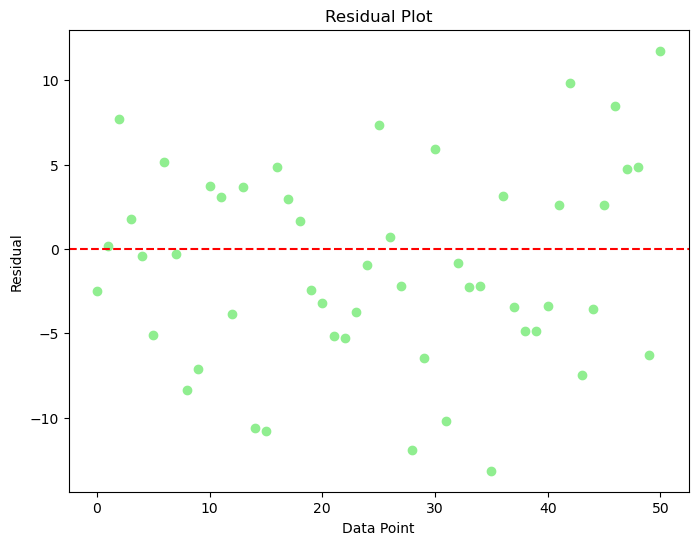

In [19]:
# Compute residuals
residuals = y_test- y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='lightgreen')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("bodyfat.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['BodyFat', 'Density'])  # Features (all columns except 'BodyFat')
y = df['BodyFat']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = train_data = X_train.join(y_train)


from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)


print('Results for MLPRegressor')
# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate MAE
mae = calculate_mae(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate SD
sd = calculate_sd(y_test, y_pred)
print("Standard Deviation (SD):", sd)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAC
mac = calculate_mac(y_test, y_pred)
print("Mean Absolute Correlation (MAC):", mac)

Results for MLPRegressor
Mean Squared Error: 22.3200
Mean Absolute Error (MAE): 4.079493909569938
Standard Deviation (SD): 4.604822900060731
Root Mean Squared Error (RMSE): 4.724407781700765
Mean Absolute Correlation (MAC): 0.943391508342306


In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the SVM model
svm = SVR(kernel='rbf', C=1000, gamma='auto')

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)



print('Results for SVR')
# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate MAE
mae = calculate_mae(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate SD
sd = calculate_sd(y_test, y_pred)
print("Standard Deviation (SD):", sd)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAC
mac = calculate_mac(y_test, y_pred)
print("Mean Absolute Correlation (MAC):", mac)

Results for SVR
Mean Squared Error: 47.6691
Mean Absolute Error (MAE): 5.624766171273132
Standard Deviation (SD): 6.7484000420745485
Root Mean Squared Error (RMSE): 6.9042778603207795
Mean Absolute Correlation (MAC): 0.8772512998403067


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


print('Results for LinearRegression')
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate MAE
mae = calculate_mae(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate SD
sd = calculate_sd(y_test, y_pred)
print("Standard Deviation (SD):", sd)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAC
mac = calculate_mac(y_test, y_pred)
print("Mean Absolute Correlation (MAC):", mac)

Results for LinearRegression
Mean Squared Error: 17.979968994818282
Mean Absolute Error (MAE): 3.329253769598868
Standard Deviation (SD): 4.1800625080031075
Root Mean Squared Error (RMSE): 4.240279353393864
Mean Absolute Correlation (MAC): 0.9564201792918483


In [29]:
# Get the coefficients of the linear regression model
coefficients = model.coef_

# Print the coefficients
print("Coefficients:", coefficients)
# Get the intercept of the linear regression model
intercept = model.intercept_

# Print the intercept
print("Intercept:", intercept)
l = [-14.27982840748652, 0.07717916, -0.05317256, -0.09571542, -0.25130638, -0.13947584,  0.96062077,
 -0.12553607,  0.14559611, -0.10280905,  0.26851207,  0.27926964,  0.25092554,
 -1.83826677]
print(l)

Coefficients: [ 0.07717916 -0.05317256 -0.09571542 -0.25130638 -0.13947584  0.96062077
 -0.12553607  0.14559611 -0.10280905  0.26851207  0.27926964  0.25092554
 -1.83826677]
Intercept: -14.27982840748652
[-14.27982840748652, 0.07717916, -0.05317256, -0.09571542, -0.25130638, -0.13947584, 0.96062077, -0.12553607, 0.14559611, -0.10280905, 0.26851207, 0.27926964, 0.25092554, -1.83826677]


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf:.4f}")

# Calculate MAE
mae = calculate_mae(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate SD
sd = calculate_sd(y_test, y_pred)
print("Standard Deviation (SD):", sd)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAC
mac = calculate_mac(y_test, y_pred)
print("Mean Absolute Correlation (MAC):", mac)

Mean Squared Error (Random Forest): 16.6809
Mean Absolute Error (MAE): 3.329253769598868
Standard Deviation (SD): 4.1800625080031075
Root Mean Squared Error (RMSE): 4.240279353393864
Mean Absolute Correlation (MAC): 0.9564201792918483


In [25]:
import joblib
# Save the model to a file
joblib.dump(rf_model, 'model.pkl')

['model.pkl']